In [23]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] =  1.6

In [4]:
EVAL_DIR = '/run/media/root/Windows/Users/agnes/Downloads/data/msmarco/eval'

In [28]:
rr_df =  pd.read_csv(os.path.join(EVAL_DIR, 'rr_queries_model_sbert_2020-03-19_11-33.csv'))

In [29]:
rr_df.describe()

,qid,original,degree_2,degree_3,degree_4,degree_4_split,degree_8,degree_8_split,original_irrelevant
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,42.500000,0.206330,0.133943,0.123764,0.108092,0.113032,0.109434,0.108836,0.136758
std,24.969982,0.261463,0.094766,0.077692,0.069705,0.083669,0.080259,0.070523,0.069293
min,0.000000,0.031250,0.033520,0.037246,0.037581,0.035420,0.035222,0.040123,0.036918
25%,21.250000,0.052632,0.064238,0.073816,0.066112,0.064029,0.055162,0.058735,0.080825
50%,42.500000,0.111111,0.096907,0.106692,0.085208,0.085413,0.079984,0.082200,0.122864
75%,63.750000,0.200000,0.175062,0.136614,0.117932,0.133576,0.139344,0.143554,0.191469
max,85.000000,1.000000,0.431548,0.398148,0.423611,0.472222,0.435870,0.394490,0.295871


In [30]:
def calc_mean_diff(rr_df,
              types_1=['original'],
              types_2=['degree_2', 'degree_3', 'degree_4', 'degree_4_split', 'degree_8', 'degree_8_split']):

    rr_described = rr_df.describe()
    types_1_mean = np.mean(rr_described.loc['mean',types_1].values)
    types_2_mean = np.mean(rr_described.loc['mean',types_2].values)
    return types_1_mean - types_2_mean


print(calc_mean_diff(rr_df))
print(calc_mean_diff(rr_df, types_2=['degree_2']))

0.09014626785141212
0.07238656682539071


In [31]:
def rename_types_dict(name):
    if name == 'original':
        return 'rel_original'
    elif name == 'original_irrelevant':
        return 'irrel_original'    
    m = re.match("(degree_)([\d]+)", name)
    if not m:
        raise Exception("Unknown column name '" + name + "'")
    number = m.group(2)
    if name.endswith('split'):
        return 'rel_degree_' + str(number) + '_split'
    return 'rel_degree_' + str(number)

In [32]:
def make_mrr_boxplots(data, cols, id_vars=['qid'], ylabel='MRR', xlabel='document type', title='',
                      figsize=(8,8)):
    
    fig = plt.figure(figsize=figsize)
    
    data_melted = pd.melt(data, id_vars=['qid'], value_vars=cols)
    
    ax = sns.boxplot(x="variable", y="value", data=data_melted, palette="colorblind", showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(plt.xticks()[0], [rename_types_dict(x) for x in cols])


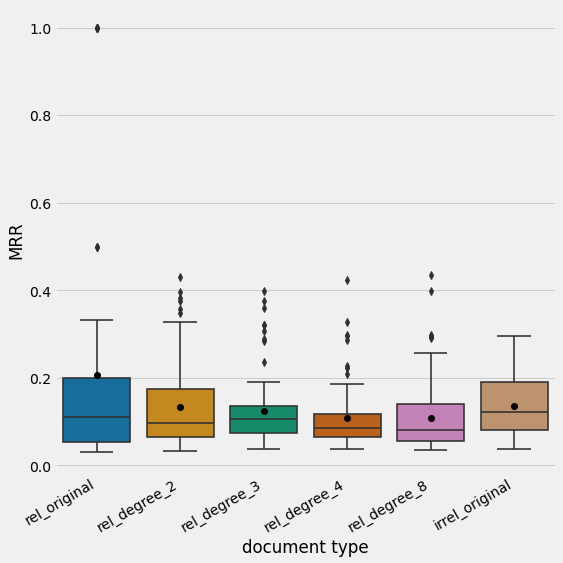

In [33]:
cols = ['original'] + \
       [x for x in rr_df.columns if x.startswith('degree_') and not x.endswith('split')] + \
       ['original_irrelevant']
make_mrr_boxplots(rr_df, cols)

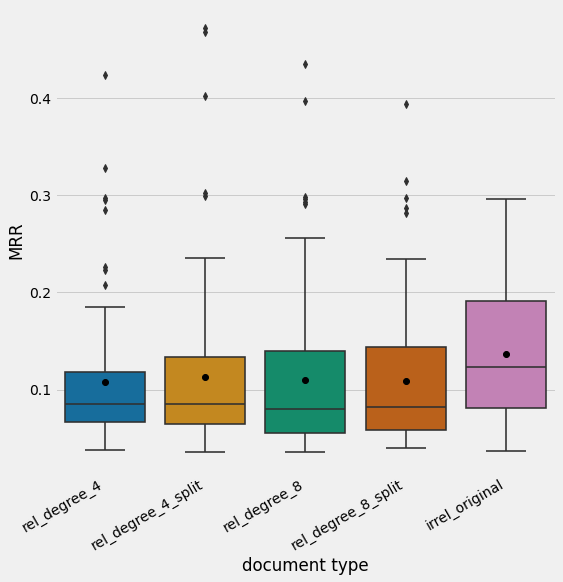

In [34]:
cols =  \
       ['degree_4', 'degree_4_split'] +\
       ['degree_8', 'degree_8_split'] + \
       ['original_irrelevant']


make_mrr_boxplots(rr_df, cols)